In [1]:
cd ..

/home/jaidevd/src/chart-ann


In [2]:
%run -i models.py

2021-08-26 19:14:52.530634: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-26 19:14:53.619025: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-26 19:14:53.642991: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-26 19:14:53.643274: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.683GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2021-08-26 19:14:53.643289: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-26 19:14:53.645656: I tensorflow/stream_executor/plat

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [3]:
boxes = labels

In [6]:
from shapely.geometry import Polygon
import geopandas as gpd

In [42]:
variables = {'LENC': ['bar', 'map', 'donut', 'line', 'scatter']}

d = []
for box, label in zip(boxes, variables["LENC"]):
    for top, left, bottom, right in box:
        d.append(
            {
                "label": label,
                "geometry": Polygon(
                    [(left, top), (right, top), (right, bottom), (left, bottom)]
                ),
            }
        )
d = gpd.GeoDataFrame(d)

In [28]:
def compare_iou(x, y):
    i = x.geometry.intersection(y.geometry).area
    smaller = min([x, y], key=lambda g: g.geometry.area)
    if i >= (smaller.geometry.area / 2):
        return smaller.name
    return False

In [31]:
to_drop = []
for i in range(13):
    for j in range(13):
        if i != j:
            smaller = compare_iou(d.iloc[i], d.iloc[j])
            if smaller:
                to_drop.append(smaller)

<AxesSubplot:>

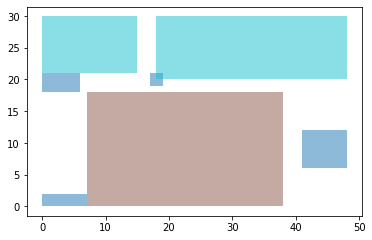

In [32]:
d.drop(set(to_drop), axis=0).plot('label', alpha=0.5)

In [33]:
d = [(1, 2)]

In [34]:
(1, 2) in d

True

In [35]:
(2, 1) in d

False

In [36]:
from itertools import combinations

In [56]:
for (ix, x), (iy, y) in combinations(d.iterrows(), 2):
    break

In [57]:
x

label                                       bar
geometry    POLYGON ((0 0, 7 0, 7 2, 0 2, 0 0))
Name: 0, dtype: object

In [58]:
y

label                                              bar
geometry    POLYGON ((41 6, 48 6, 48 12, 41 12, 41 6))
Name: 1, dtype: object

In [59]:
ix

0

In [60]:
iy

1